In [1]:
import ssl

import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pylab as pyl
import vaex
import vaex.jupyter

ssl_context = ssl._create_unverified_context()

In [2]:
df = vaex.example()
df

#,id,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,0,1.2318684,-0.39692867,-0.59805775,301.15527,174.05948,27.427546,-149431.4,407.38898,333.95554,-1.0053853
1,23,-0.16370061,3.6542213,-0.25490645,-195.00023,170.47217,142.53023,-124247.95,890.24115,684.6676,-1.708667
2,32,-2.120256,3.3260527,1.7078403,-48.63423,171.6473,-2.0794373,-138500.55,372.2411,-202.17618,-1.8336141
3,8,4.715589,4.585251,2.2515438,-232.42084,-294.85083,62.85865,-60037.04,1297.6304,-324.6875,-1.4786882
4,16,7.217187,11.994717,-1.0645622,-1.6891745,181.32935,-11.333611,-83206.84,1332.799,1328.949,-1.8570484
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",21,1.9938701,0.7892761,0.2220599,-216.9299,16.12442,-211.24438,-146457.44,457.72247,203.36758,-1.7451677
"329,996",25,3.7180912,0.7213376,1.6415337,-185.9216,-117.250824,-105.49866,-126627.11,335.00256,-301.837,-0.9822322
"329,997",14,0.36885077,13.029609,-3.6339347,-53.677147,-145.15771,76.7091,-84912.26,817.1376,645.8507,-1.7645613
"329,998",18,-0.112592645,1.4529126,2.1689527,179.30865,205.7971,-68.75873,-133498.47,724.00024,-283.69104,-1.8808953


In [3]:
df.x

Expression = x
Length: 330,000 dtype: float32 (column)
---------------------------------------
     0    1.23187
     1  -0.163701
     2   -2.12026
     3    4.71559
     4    7.21719
       ...       
329995    1.99387
329996    3.71809
329997   0.368851
329998  -0.112593
329999    20.7962

In [4]:
df.x.values

array([ 1.2318684 , -0.16370061, -2.120256  , ...,  0.36885077,
       -0.11259264, 20.79622   ], dtype=float32)

In [5]:
np.sqrt(df.x ** 2 + df.y ** 2 + df.z ** 2)

Expression = sqrt((((x ** 2) + (y ** 2)) + (z ** 2)))
Length: 330,000 dtype: float32 (expression)
-------------------------------------------
     0  1.42574
     1  3.66676
     2  4.29824
     3  6.95203
     4   14.039
      ...      
329995  2.15587
329996  4.12785
329997  13.5319
329998  2.61304
329999  24.3339

In [6]:
df['r'] = np.sqrt(df.x ** 2 + df.y ** 2 + df.z ** 2)
df[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,1.2318684,-0.39692867,-0.59805775,1.4257367
1,-0.16370061,3.6542213,-0.25490645,3.6667573
2,-2.120256,3.3260527,1.7078403,4.298236
3,4.715589,4.585251,2.2515438,6.9520326
4,7.217187,11.994717,-1.0645622,14.039028
...,...,...,...,...
"329,995",1.9938701,0.7892761,0.2220599,2.1558723
"329,996",3.7180912,0.7213376,1.6415337,4.127852
"329,997",0.36885077,13.029609,-3.6339347,13.531897
"329,998",-0.112592645,1.4529126,2.1689527,2.6130419


In [7]:
df.select(df.x < 0)

In [8]:
df.evaluate(df.x, selection=True)

array([-0.16370061, -2.120256  , -7.7843747 , ..., -8.126636  ,
       -3.9477386 , -0.11259264], dtype=float32)

In [9]:
df_neg = df[df.x < 0]
df_neg[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,-0.16370061,3.6542213,-0.25490645,3.6667573
1,-2.120256,3.3260527,1.7078403,4.298236
2,-7.7843747,5.9897747,-0.6826952,9.84581
3,-3.5571861,5.413629,0.09171557,6.478377
4,-20.81394,-3.2946775,13.486608,25.019264
...,...,...,...,...
"166,274",-2.5926425,-2.8716717,-0.18048334,3.8730955
"166,275",-0.7566012,2.9830434,-6.940553,7.592251
"166,276",-8.126636,1.1619766,-1.6459038,8.372658
"166,277",-3.9477386,-3.0684903,-1.5822703,5.2444115


In [10]:
df.count(), df.mean(df.x), df.mean(df.x, selection=True)

(array(330000), array(-0.0632868), array(-5.18457762))

In [11]:
# Group in 64 bins dividing up the range -10 to +10
counts_x = df.count(binby=df.x, limits=[-10, 10], shape=64)
counts_x

array([1374, 1350, 1459, 1618, 1706, 1762, 1852, 2007, 2240, 2340, 2610,
       2840, 3126, 3337, 3570, 3812, 4216, 4434, 4730, 4975, 5332, 5800,
       6162, 6540, 6805, 7261, 7478, 7642, 7839, 8336, 8736, 8279, 8269,
       8824, 8217, 7978, 7541, 7383, 7116, 6836, 6447, 6220, 5864, 5408,
       4881, 4681, 4337, 4015, 3799, 3531, 3320, 3040, 2866, 2629, 2488,
       2244, 1981, 1905, 1734, 1540, 1437, 1378, 1233, 1186])

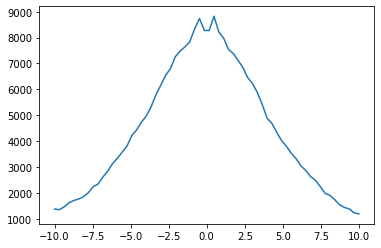

In [12]:
plt.plot(np.linspace(-10, 10, 64), counts_x);

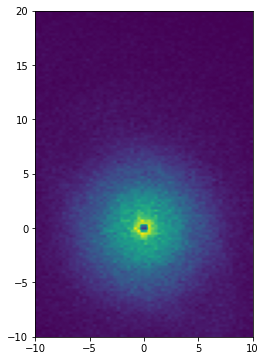

In [13]:
plt.figure(figsize=[12, 6])
xy_counts = df.count(
    binby=[df.x, df.y], limits=[[-10, 10], [-10, 20]], shape=[64, 128])
plt.imshow(xy_counts.T, origin='lower', extent=[-10, 10, -10, 20]);

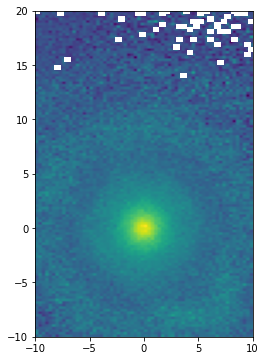

In [14]:
plt.figure(figsize=[12, 6])
v = np.sqrt(df.vx ** 2 + df.vy **2 + df.vz **2)
xy_mean_v = df.mean(
    v,
    binby=[df.x, df.y],
    limits=[[-10, 10], [-10, 20]],
    shape=[64, 128])
plt.imshow(xy_mean_v.T, origin='lower', extent=[-10, 10, -10, 20]);

In [15]:
x = np.arange(5)
y = x ** 2
# from_csv, from_pandas
df = vaex.from_arrays(x=x, y=y)  
df

#,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


In [16]:
nyc_taxi = vaex.open(
    's3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')
nyc_taxi.head()

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7319,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7204,3.7,0,nan,0,0,3.7
5,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6
6,DDS,2009-01-21 08:55:57.000000000,2009-01-21 09:05:42.000000000,1,CREDIT,0.4,-73.984,40.7435,nan,nan,-73.9803,40.7489,5.7,0,nan,1,0,6.7
7,VTS,2009-01-04 04:31:00.000000000,2009-01-04 04:36:00.000000000,1,CASH,1.72,-73.9926,40.7484,nan,nan,-73.9956,40.7283,6.1,0.5,nan,0,0,6.6
8,CMT,2009-01-05 16:29:02.000000000,2009-01-05 16:40:21.000000000,1,Credit,1.6,-73.9697,40.7492,nan,nan,-73.9904,40.7511,8.7,0,nan,1.3,0,10
9,CMT,2009-01-05 18:53:13.000000000,2009-01-05 18:57:45.000000000,1,Cash,0.7,-73.9552,40.783,nan,nan,-73.9586,40.7748,5.9,0,nan,0,0,5.9


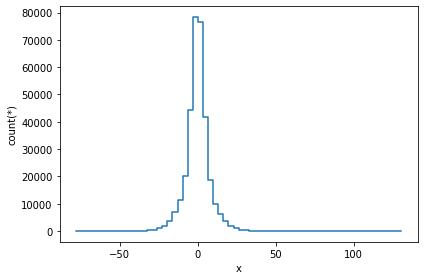

In [17]:
df = vaex.example()
df.viz.histogram(df.x);

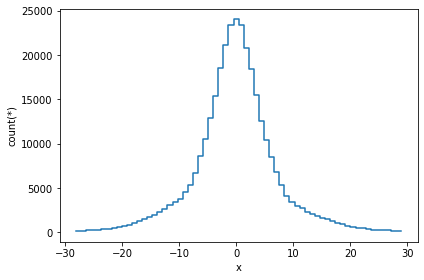

In [18]:
df.viz.histogram(df.x, limits='99.7%');

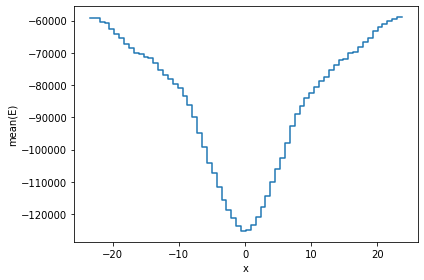

In [19]:
df.viz.histogram(df.x, what='mean(E)', limits='99%');

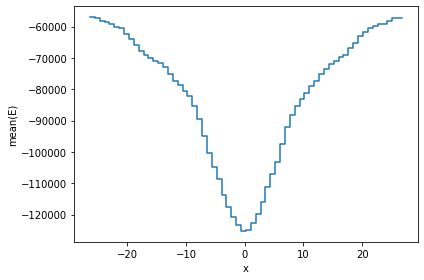

In [20]:
df.viz.histogram(df.x, what=vaex.stat.mean(df.E), limits='99.5%');

In [21]:
np.log(vaex.stat.mean(df.x) / vaex.stat.std(df.x))

log((mean(x) / std(x)))

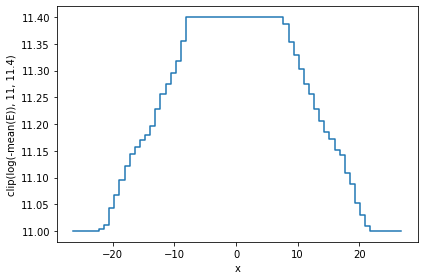

In [22]:
df.viz.histogram(
    df.x,
    what=np.clip(np.log(-vaex.stat.mean(df.E)), 11, 11.4),
    limits='99.5%');

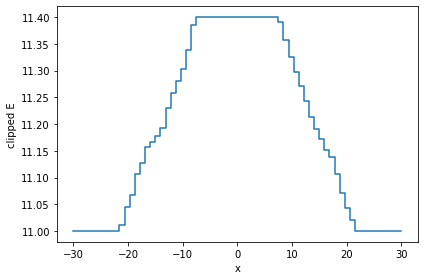

In [23]:
limits = [-30, 30]
shape = 64
meanE = df.mean(df.E, binby=df.x, limits=limits, shape=shape)
grid = np.clip(np.log(-meanE), 11, 11.4)
df.viz.histogram(df.x, grid=grid, limits=limits, ylabel='clipped E');

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: invalid value encountered in log
  result = function(*numpy_data, **kwargs)


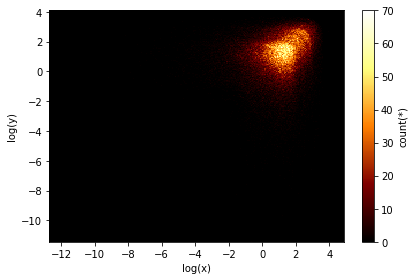

In [24]:
df.viz.heatmap(np.log(df.x), np.log(df.y));

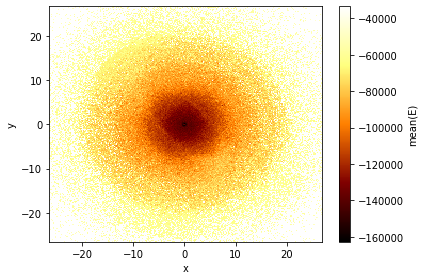

In [25]:
df.viz.heatmap(df.x, df.y, what=vaex.stat.mean(df.E), limits='99.5%');

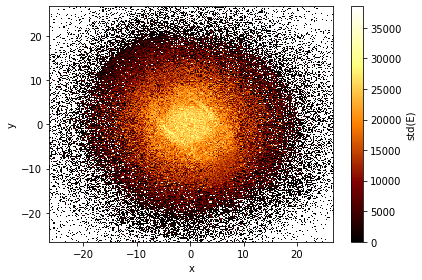

In [26]:
df.viz.heatmap(df.x, df.y, what=vaex.stat.std(df.E), limits='99.5%');

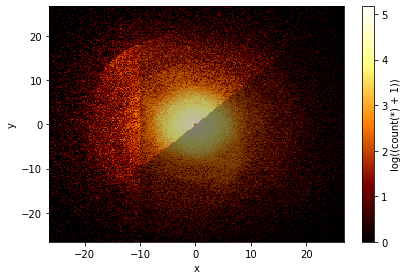

In [27]:
df.viz.heatmap(
    df.x,
    df.y,
    what=np.log(vaex.stat.count() + 1),
    limits='99.5%',
    selection=[None, df.x < df.y, df.x < -10]);

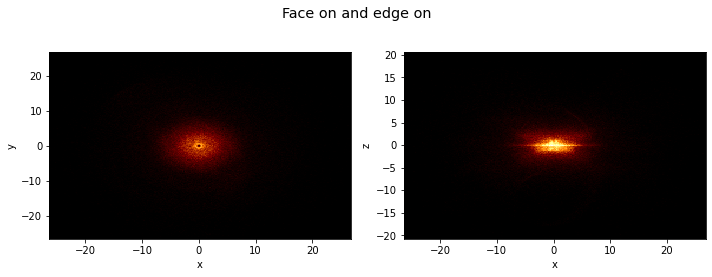

In [28]:
df.viz.heatmap(
    [['x', 'y'], ['x', 'z']],
    limits='99.5%',
    title='Face on and edge on',
    figsize=[10, 4]);

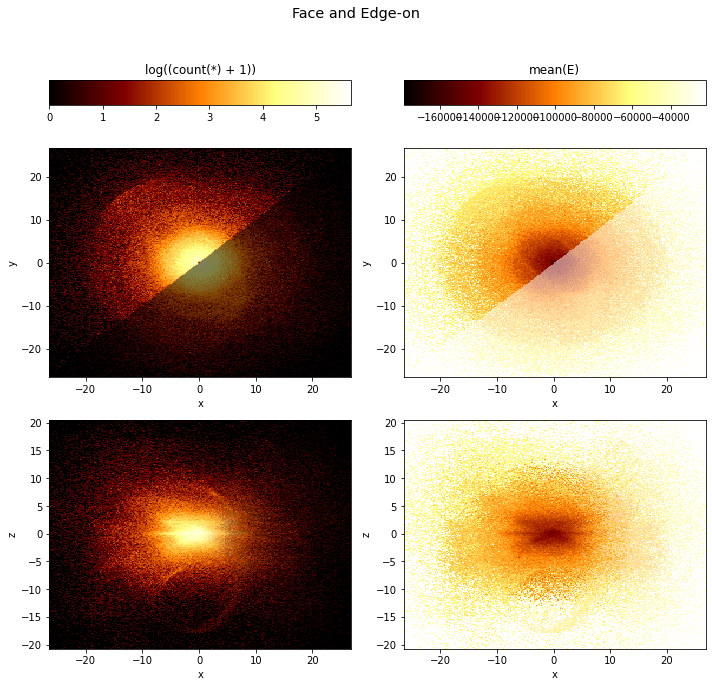

In [29]:
df.viz.heatmap(
    [['x', 'y'], ['x', 'z']],
    limits='99.5%',
    what=[np.log(vaex.stat.count() + 1), vaex.stat.mean(df.E)],
    selection=[None, df.x < df.y],
    title='Face and Edge-on',
    figsize=[10, 10]);

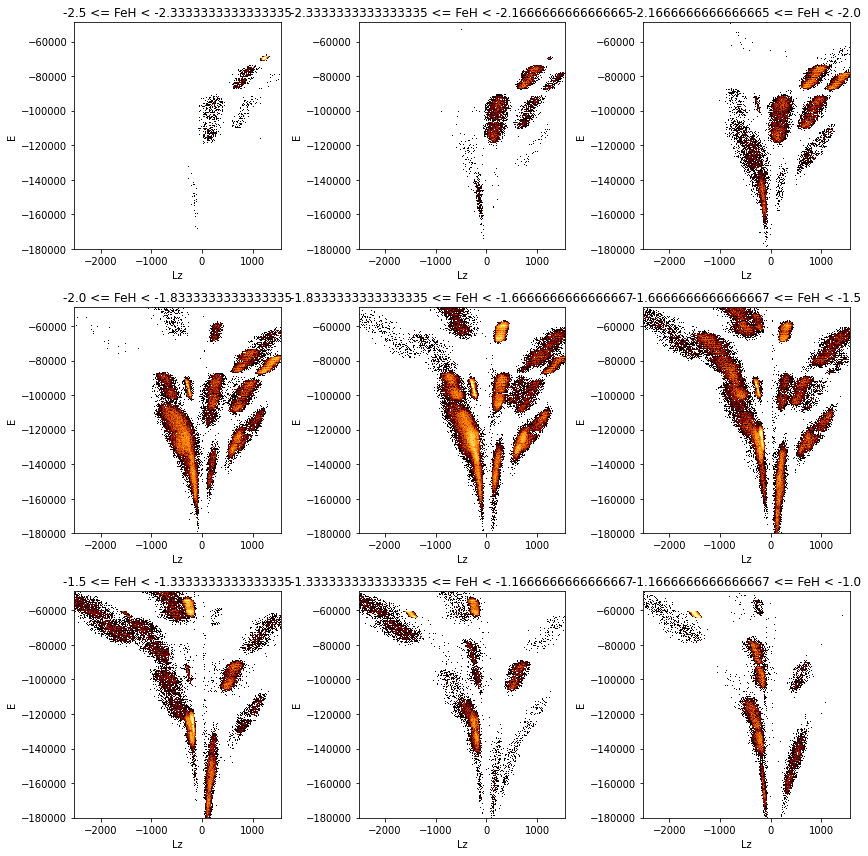

In [30]:
df.viz.heatmap(
    'Lz',
    'E',
    limits='99.5%',
    z='FeH:-2.5,-1,9',
    show=True,
    visual={'row': 'z'},
    figsize=[12, 12],
    f='log',
    wrap_columns=3);

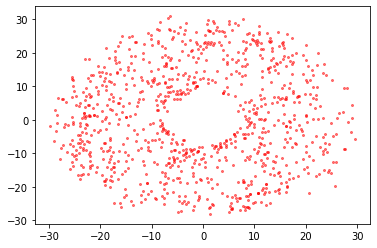

In [31]:
x = df.evaluate('x', selection=df.Lz < -2500)
y = df.evaluate('y', selection=df.Lz < -2500)
plt.scatter(x, y, c='red', alpha=0.5, s=4);

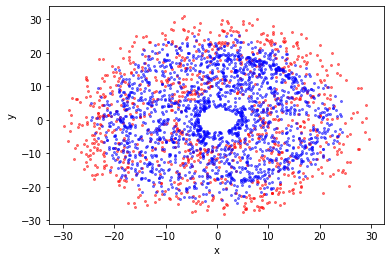

In [32]:
df.viz.scatter(
    df.x, df.y, selection=df.Lz < -2500, c='red', alpha=0.5, s=4)
df.viz.scatter(
    df.x, df.y, selection=df.Lz > 1500, c='blue', alpha=0.5, s=4);

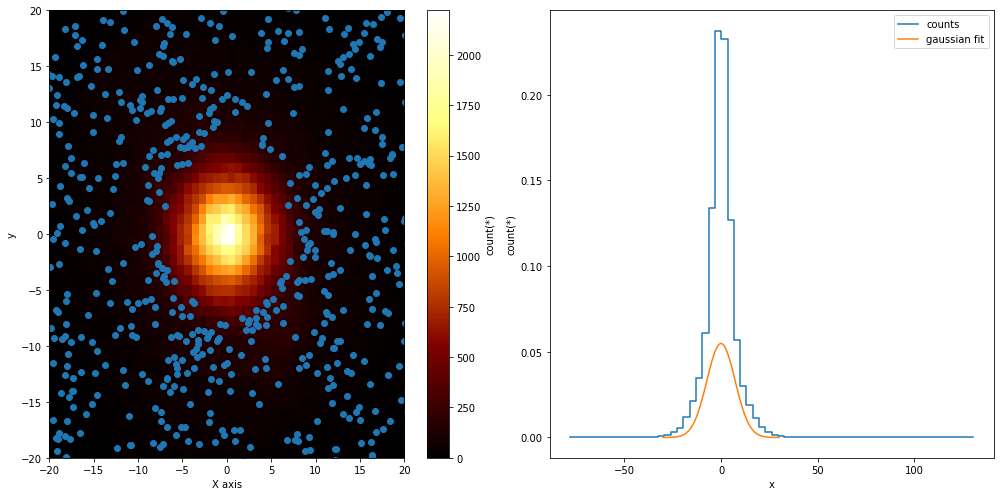

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 7])
plt.sca(ax1)
selection = df.Lz < -2500
x = df[selection].x.evaluate()
y = df[selection].y.evaluate()
df.viz.heatmap(df.x, df.y)
plt.scatter(x, y)
plt.xlabel('X axis')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.sca(ax2)
df.viz.histogram(df.x, label='counts', n=True)
x = np.linspace(-30, 30, 100)
std = df.std(df.x.expression)
y = np.exp(-(x**2 / std**2 / 2)) / np.sqrt(2*np.pi) / std
plt.plot(x, y, label='gaussian fit')
plt.legend();

In [34]:
tgas = vaex.datasets.tgas(full=True)

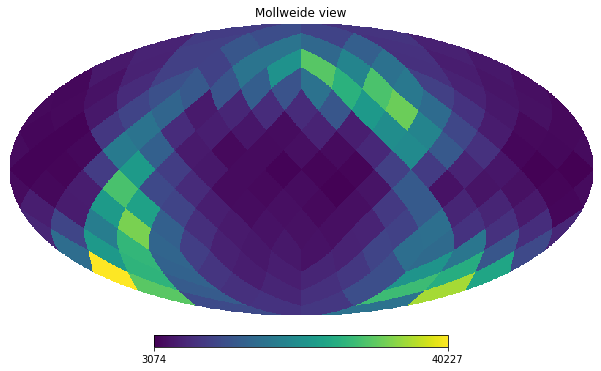

In [35]:
level = 2
factor = 34_359_738_368 * (4**(12 - level))
nmax = hp.nside2npix(2 ** level)
eps = 1e-16
counts = tgas.count(
    binby=tgas.source_id / factor, limits=[eps, nmax -eps], shape=nmax)
hp.mollview(counts, nest=True)

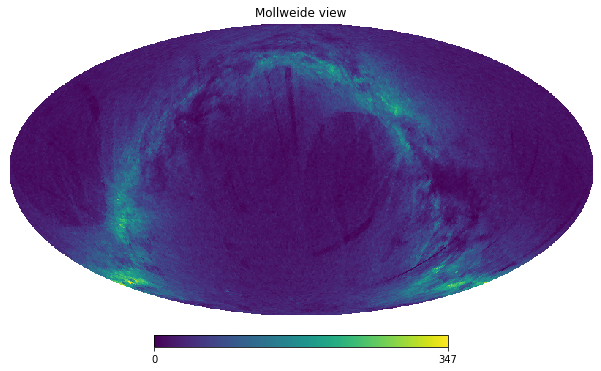

In [36]:
counts = tgas.healpix_count(healpix_level=6)
hp.mollview(counts, nest=True)

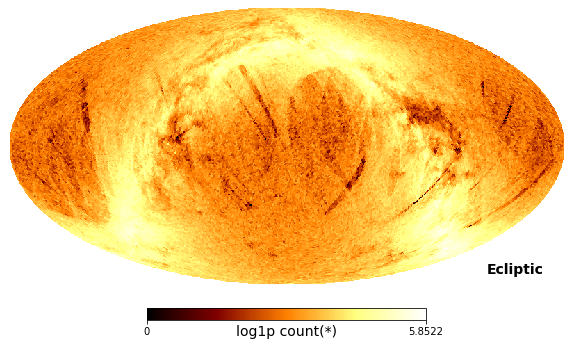

In [37]:
tgas.viz.healpix_heatmap(
    f='log1p',
    healpix_level=6,
    figsize=[10, 8],
    healpix_output='ecliptic')

In [38]:
xarr = df.count(
    binby=[df.x, df.y], limits=[-10, 10], shape=64, array_type='xarray')
xarr

<xarray.DataArray (x: 64, y: 64)>
array([[ 6,  3,  7, ..., 15, 10, 11],
       [10,  3,  7, ..., 10, 13, 11],
       [ 5, 15,  5, ..., 12, 18, 12],
       ...,
       [ 7,  8, 10, ...,  6,  7,  7],
       [12, 10, 17, ..., 11,  8,  2],
       [ 7, 10, 13, ...,  6,  5,  7]])
Coordinates:
  * x        (x) float64 -9.844 -9.531 -9.219 -8.906 ... 8.906 9.219 9.531 9.844
  * y        (y) float64 -9.844 -9.531 -9.219 -8.906 ... 8.906 9.219 9.531 9.844

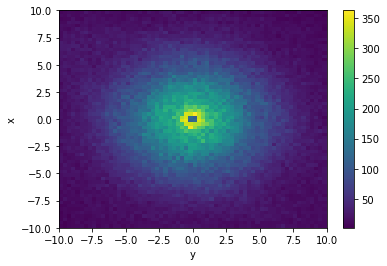

In [39]:
xarr.plot();

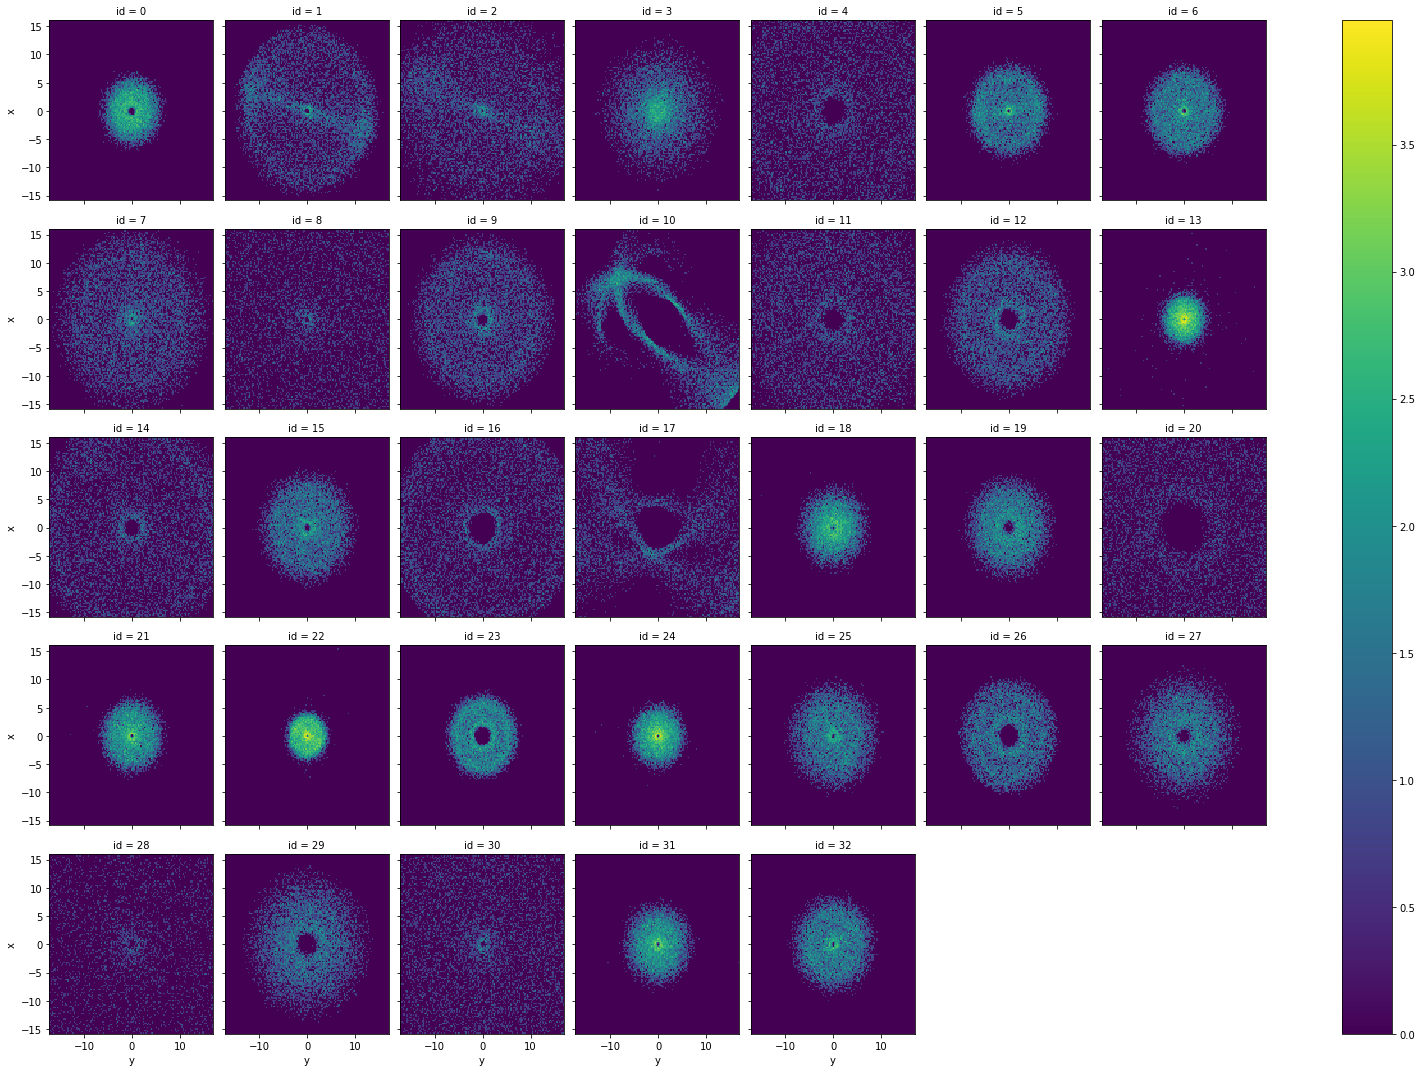

In [40]:
df.categorize('id', inplace=True)
xarr = df.count(
    binby=['x', 'y', 'id'], limits='95%', array_type='xarray')
np.log1p(xarr).plot(col='id', col_wrap=7);

In [41]:
df = vaex.example()
df.select(df.x > 0)

In [42]:
@vaex.jupyter.interactive_selection(df)
def plot(*args, **kwargs):
    print('Mean x for the selection is:', df.mean(df.x, selection=True))
    df.viz.heatmap(
        df.x,
        df.y,
        what=np.log(vaex.stat.count() + 1),
        selection=[None, True],
        limits='99.5%')
    pyl.show()

Output()

<Figure size 432x288 with 0 Axes>

In [43]:
a = np.array(['a', 'b', 'c'])
x = np.arange(1, 4)
df1 = vaex.from_arrays(a=a, x=x)
df1

#,a,x
0,a,1
1,b,2
2,c,3


In [44]:
b = np.array(['a', 'b', 'd'])
y = x ** 2
df2 = vaex.from_arrays(b=b, y=y)
df2

#,b,y
0,a,1
1,b,4
2,d,9


In [45]:
df1.join(df2, left_on='a', right_on='b')  # left

#,a,x,b,y
0,a,1,a,1
1,b,2,b,4
2,c,3,--,--


In [46]:
df1.join(df2, left_on='a', right_on='b', how='inner')

#,a,x,b,y
0,a,1,a,1
1,b,2,b,4


In [47]:
animal = ['dog', 'dog', 'cat', 'pig', 'pig', 'dog']
age = [2, 1, 5, 1, 3, 7]
cuteness = [9, 10, 5, 8, 4, 8]
pets = vaex.from_arrays(animal=animal, age=age, cuteness=cuteness)
pets

#,animal,age,cuteness
0,dog,2,9
1,dog,1,10
2,cat,5,5
3,pig,1,8
4,pig,3,4
5,dog,7,8


In [48]:
pets\
    .groupby(by='animal')\
    .agg({'age': 'mean', 'cuteness': ['mean', 'std']})

#,animal,age,cuteness_mean,cuteness_std
0,pig,2,6,2
1,dog,3.33333,9,0.816497
2,cat,5,5,0


In [49]:
pets.groupby(
    by='animal',
    agg={
        'mean_age': vaex.agg.mean('age'),
        'cuteness_unique': vaex.agg.nunique('cuteness'),
        'cuteness_min': vaex.agg.min('cuteness')})

#,animal,mean_age,cuteness_unique,cuteness_min
0,pig,2,2,4
1,dog,3.33333,3,8
2,cat,5,1,5


In [50]:
text = ['Something', 'wicked this', 'way comes', '.']
df = vaex.from_arrays(text=text)
df

#,text
0,Something
1,wicked this
2,way comes
3,.


In [51]:
df.text.str.upper()

Expression = str_upper(text)
Length: 4 dtype: string (expression)
------------------------------------
0    SOMETHING
1  WICKED THIS
2    WAY COMES
3            .

In [52]:
df.text.str.replace('th', 'bl').str.title()

Expression = str_title(str_replace(text, 'th', 'bl'))
Length: 4 dtype: string (expression)
------------------------------------
0    Somebling
1  Wicked Blis
2    Way Comes
3            .

In [53]:
df.text.str.contains('w')

Expression = str_contains(text, 'w')
Length: 4 dtype: bool (expression)
----------------------------------
0  False
1   True
2   True
3  False

In [54]:
df.text.str.count('i')

Expression = str_count(text, 'i')
Length: 4 dtype: int64 (expression)
-----------------------------------
0  1
1  2
2  0
3  0

In [55]:
tgas.add_virtual_columns_distance_from_parallax(tgas.parallax)
tgas.add_virtual_columns_eq2gal('ra', 'dec', 'l', 'b')
tgas.add_virtual_columns_spherical_to_cartesian(
    tgas.l, tgas.b, tgas.distance, 'x', 'y', 'z')

#,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_n_bad_obs_ac,astrometric_n_bad_obs_al,astrometric_n_good_obs_ac,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_primary_flag,astrometric_priors_used,astrometric_relegation_factor,astrometric_weight_ac,astrometric_weight_al,b,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,duplicated_source,ecl_lat,ecl_lon,hip,l,matched_observations,parallax,parallax_error,parallax_pmdec_corr,parallax_pmra_corr,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_g_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,ra,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,random_index,ref_epoch,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,solution_id,source_id,tycho2_id,distance,x,y,z
0,1.9190567,0.7171010000916003,412.6059727233687,1,0,78,79,79,79,84,3,2.9360971,1.2669624e-05,1.8181574,-16.121042828114014,0.23539164875137225,0.21880220693566088,-0.40733817,0.06065882,-0.099451326,70,-16.121052173353853,42.64182504417002,13989,42.641804308626725,9,6.35295075173405,0.3079103606852086,-0.10195717,-0.0015767893,10312332.172993332,10577.365273118843,7.991377829505826,77,b'NOT_AVAILABLE',-7.641989988351149,0.08740179334554747,43.75231341609215,0.07054220642640081,0.21467718,45.03433035439128,-0.41497213,0.30598928200282727,0.1799662,-0.08575969,0.1592065,243619,2015.0,-113.76032,21.392918,-41.6784,26.201841,0.38234848,0.53826606,0.3923785,0.9163063,1635378410781933568,7627862074752,b'',0.15740717016058217,0.11123604040005637,0.10243667003803988,-0.04370685490397632
1,nan,0.2534628812968044,47.316290890180255,2,0,55,57,57,57,84,5,2.6523142,3.1600175e-05,12.861557,-16.19302376369384,0.2000676896877873,1.1977893944215496,0.837626,-0.975644,0.97257733,70,-16.19303311057312,42.761180489478576,-2147483648,42.76115974936648,8,3.90032893506844,0.3234880030045522,-0.85377896,0.83973897,949564.6488279914,1140.173576223928,10.580958718900256,62,b'NOT_AVAILABLE',-55.10917285969142,2.522928801165149,10.03626300124532,4.611413518289133,-0.99639875,45.1650067708984,-0.99592334,2.583882288511597,-0.86091065,0.97347987,-0.9724165,487238,2015.0,-156.43286,22.766073,-36.23966,22.890602,0.71100265,0.9659703,0.6461149,0.8671601,1635378410781933568,9277129363072,b'55-28-1',0.25638863199686845,0.1807701962996959,0.16716755815017084,-0.07150016957395491
2,nan,0.3989006354041912,221.18496561724646,4,1,57,60,61,61,84,5,3.9934018,2.5633919e-05,5.7675295,-16.12335382439265,0.24882543945301736,0.1803264123376257,-0.39189115,-0.19325553,0.08942046,70,-16.123363170402296,42.69750168007008,-2147483648,42.69748094193635,7,3.1553132200367373,0.2734838183180671,-0.11855248,-0.041858733,817837.6000768564,1827.3836759985832,10.743102380434273,60,b'NOT_AVAILABLE',-1.602867102186794,1.0352589283446592,2.9322836829569003,1.908644426623371,-0.9142707,45.08615483797584,-0.17744322,0.2138361631952843,0.30772242,-0.18481661,0.046866808,1948952,2015.0,-117.007515,19.772154,-43.10822,26.715704,0.48252776,0.42875847,0.5241528,0.9030617,1635378410781933568,13297218905216,b'55-1191-1',0.31692574722846595,0.22376103019475546,0.2064625216744117,-0.08801225918215205
3,nan,0.4224923646481251,179.98201436339852,1,0,51,52,52,52,84,5,4.215158,2.8672603e-05,5.3608623,-16.118206879297034,0.24821079122833972,0.20095844850181172,-0.33721715,-0.22350119,0.13181144,70,-16.11821622503516,42.67779093546686,-2147483648,42.67777019818556,7,2.292366835156796,0.2809724206784257,-0.109202355,-0.049440864,602053.4754362862,905.8772856344845,11.075682394435745,61,b'NOT_AVAILABLE',-18.414912114825732,1.1298513589995536,3.661982345981763,2.065051873379775,-0.9261773,45.06654155758114,-0.36570677,0.2760390513575931,0.20287822,-0.05892885,-0.050908856,102321,2015.0,-132.42113,22.569283,-38.954453,25

In [56]:
tgas['ra_error'] = tgas.ra_error / 1000 / 3600
tgas['dec_error'] = tgas.dec_error / 1000 / 3600

In [61]:
tgas.propagate_uncertainties([tgas.x, tgas.y, tgas.z])
tgas_50 = tgas.sample(50)

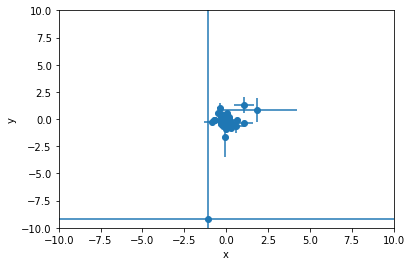

In [62]:
tgas_50.viz.scatter(
    tgas_50.x,
    tgas_50.y,
    xerr=tgas_50.x_uncertainty,
    yerr=tgas_50.y_uncertainty)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

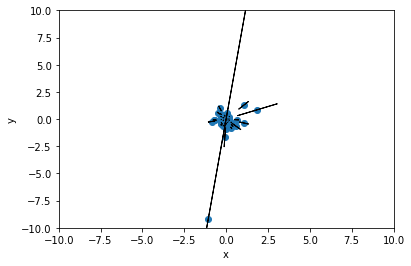

In [63]:
tgas_50.viz.scatter(
    tgas_50.x,
    tgas_50.y,
    xerr=tgas_50.x_uncertainty,
    yerr=tgas_50.y_uncertainty,
    cov=tgas_50.y_x_covariance)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

In [64]:
def arc_distance(theta1, phi1, theta2, phi2):
    temp = (
        np.sin((theta2 - 2 - theta1) / 2)**2
        + np.cos(theta1)*np.cos(theta2)*np.sin((phi2 - phi1) / 2)**2)
    dist_matrix = 2 * (np.arctan2(np.sqrt(temp), np.sqrt(1 - temp)))
    return dist_matrix

In [66]:
nyc_taxi.set_active_fraction(0.2)

In [67]:
nyc_taxi['arc_distance'] = arc_distance(
    nyc_taxi.pickup_longitude * np.pi / 180,
    nyc_taxi.pickup_latitude * np.pi / 180,
    nyc_taxi.dropoff_longitude * np.pi / 180,
    nyc_taxi.dropoff_latitude * np.pi / 180)

In [ ]:
%%time
nyc_taxi.mean(nyc_taxi.arc_distance)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/vaex/functions.py:95: RuntimeWarning: invalid value encountered in sqrt
  result = function(*numpy_data, **kwargs)


In [ ]:
nyc_taxi['arc_dist_jit'] = nyc_taxi.arc_distance.jit_numba()

In [ ]:
%%time
nyc_taxi.mean(nyc_taxi.arc_dist_jit)

In [3]:
limits = [-10, 10]
delayed_count = df.count(
    df.E, binby=df.x, limits=limits, shape=4, delay=True)
delayed_count

In [4]:
delayed_sum = df.sum(
    df.E, binby=df.x, limits=limits, shape=4, delay=True)

In [5]:
@vaex.delayed
def calculate_mean(sums, counts):
    print('calculating mean')
    return sums / counts

In [6]:
print('Before calling mean')
delayed_mean = calculate_mean(delayed_sum, delayed_count)
delayed_mean

Before calling mean


In [7]:
@vaex.delayed
def print_mean(means):
    print('means:', means)

In [8]:
print_mean(delayed_mean)

In [9]:
print('Before calling execute')
df.execute()

Before calling execute
calculating mean
means: [ -94323.68051598 -118749.23850834 -119119.46292653  -95021.66183457]


In [10]:
means = delayed_mean.get()
print('Means:', means)

Means: [ -94323.68051598 -118749.23850834 -119119.46292653  -95021.66183457]


In [11]:
@vaex.register_function()
def add_one(x):
    return x + 1

In [12]:
df = vaex.from_arrays(x=np.arange(4))
df.func.add_one(df.x)

Expression = add_one(x)
Length: 4 dtype: int64 (expression)
-----------------------------------
0  1
1  2
2  3
3  4

In [13]:
df.x.add_one()

Expression = add_one(x)
Length: 4 dtype: int64 (expression)
-----------------------------------
0  1
1  2
2  3
3  4

In [14]:
@vaex.register_function(on_expression=False)
def add_mul(a, b, x, y):
    return a*x + b*y

In [15]:
df['y'] = df.x ** 2
df.func.add_mul(2, 3, df.x, df.y)

Expression = add_mul(2, 3, x, y)
Length: 4 dtype: int64 (expression)
-----------------------------------
0   0
1   5
2  16
3  33

In [16]:
df['y'] = df.x ** 2
df['z'] = df.func.add_mul(2, 3, df.x, df.y)
df['w'] = df.x.add_one()
df

#,x,y,z,w
0,0,0,0,1
1,1,1,5,2
2,2,4,16,3
3,3,9,33,4


In [17]:
@vaex.register_dataframe_accessor('scale', override=True)
class ScalingOps:
    def __init__(self, df):
        self.df = df
        
    def mul(self, x):
        df = self.df.copy()
        for col in df.get_column_names(strings=False):
            if df[col].dtype:
                df[col] *= x
        return df
    
    def add(self, x):
        df = self.df.copy()
        for col in df.get_column_names(strings=False):
            if df[col].dtype:
                df[col] += x
        return df

In [18]:
df.scale.add(1)

#,x,y,z,w
0,1,1,1,2
1,2,2,6,3
2,3,5,17,4
3,4,10,34,5


In [19]:
df.scale.mul(2)

#,x,y,z,w
0,0,0,0,2
1,2,2,10,4
2,4,8,32,6
3,6,18,66,8
